#### About Dataset
Problem Statement You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

#### Task
Given a person’s credit-related information, build a machine learning model that can classify the credit score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('credit_score.csv', low_memory=False)
raw_data.head(20)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [3]:
raw_data.shape

(100000, 28)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

### Data Cleaning

ID: If it's just a unique ID for a record that doesn't contain any analytics information, you can delete it.

Customer_ID: If there is another unique identifier for customers (e.g. customer number) that is sufficient for identification, you may consider deleting this column.

Month: If your analysis does not require month as a feature, you may consider removing this column.

SSN: Due to the confidentiality of data, the Social Security Number (SSN) should be carefully protected and removed from the data if it is not necessary for analysis.

Name: If the analysis is not related to personal data, customer names may be less relevant and you may consider removing this column.

In [5]:
deleted_cols = ['ID','Customer_ID', 'Month', 'SSN', 'Name','Type_of_Loan']

In [6]:
raw_data = raw_data.drop(deleted_cols, axis = 1)

In [7]:
raw_data.shape

(100000, 22)

In [8]:
raw_data.isnull().sum()[raw_data.isnull().sum()>0]

Monthly_Inhand_Salary      15002
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64

In [9]:
for i in raw_data:
    print('\n',i,raw_data[i].unique())


 Age ['23' '-500' '28_' ... '4808_' '2263' '1342']

 Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

 Annual_Income ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

 Monthly_Inhand_Salary [1824.84333333           nan 3037.98666667 ... 3097.00833333 1929.90666667
 3359.41583333]

 Num_Bank_Accounts [   3    2    1    7    4    0    8    5    6    9   10 1414 1231   67
  572 1488   91  528 1647 1696 1338  649  889 1668  685  857  975 1496
 1534 1620   37 1388 1429 1332 1588  120 1777 1096  803  494  744 1139
  831 1613  741  121  665 1748 1644  823 1356 1651   87  711  450  210
 1671 1722  648  672 1662 1495  510  666  429 1131 1434  980 1026  526
  718 1300 1312 1315  501 1566  480 1042  322  628 1016  333 1265  791
  427  563  905 1190 1036 1611   38  619  555 1769  280  752 1201  812
 1487  222  212 1019 1222 

In [10]:
raw_data.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [11]:
numerical_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                     'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
                     'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
                     'Outstanding_Debt',
                     'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly',
                     'Monthly_Balance']
text_columns = ['Occupation', 'Credit_Mix', 'Payment_Behaviour','Credit_Score', 'Credit_History_Age','Credit_Utilization_Ratio']


In [12]:
symbols = "\\`*_{}[]()>#@+!$:;"

for i in numerical_columns:
  for j in symbols:
    raw_data[i] = raw_data[i].astype(str).str.replace(j,'',regex = False)
    
for i in text_columns:
  for j in symbols:
    raw_data[i] = raw_data[i].replace(j,'',regex = False)
    
raw_data.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,3,7,...,,809.98,26.822620,22 Years and 1 Months,No,49.57494921489417,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,nan,3,4,3,4,-1,nan,...,Good,809.98,31.944960,NaN,No,49.57494921489417,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,nan,3,4,3,4,3,7,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.57494921489417,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,nan,3,4,3,4,5,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.57494921489417,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,6,nan,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.57494921489417,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [13]:
for i in raw_data:
    print('\n',i,raw_data[i].unique())


 Age ['23' '-500' '28' ... '4808' '2263' '1342']

 Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

 Annual_Income ['19114.12' '34847.84' '143162.64' ... '37188.1' '20002.88' '39628.99']

 Monthly_Inhand_Salary ['1824.8433333333328' 'nan' '3037.986666666666' ... '3097.008333333333'
 '1929.906666666667' '3359.415833333333']

 Num_Bank_Accounts ['3' '2' '1' '7' '4' '0' '8' '5' '6' '9' '10' '1414' '1231' '67' '572'
 '1488' '91' '528' '1647' '1696' '1338' '649' '889' '1668' '685' '857'
 '975' '1496' '1534' '1620' '37' '1388' '1429' '1332' '1588' '120' '1777'
 '1096' '803' '494' '744' '1139' '831' '1613' '741' '121' '665' '1748'
 '1644' '823' '1356' '1651' '87' '711' '450' '210' '1671' '1722' '648'
 '672' '1662' '1495' '510' '666' '429' '1131' '1434' '980' '1026' '526'
 '718' '1300' '1312' '1315' '501' '1566' '480' '1042' '322' '628' '1016'
 

In [14]:
raw_data['Occupation'] = raw_data['Occupation'].replace('_______', np.nan)
raw_data['Payment_Behaviour'] = raw_data['Payment_Behaviour'].replace('!@9#%8', np.nan)
raw_data['Payment_of_Min_Amount'] = raw_data['Payment_of_Min_Amount'].replace('NM',np.nan)
raw_data['Credit_Mix'] = raw_data['Credit_Mix'].replace('_', np.nan)
raw_data['Credit_Mix'] = raw_data['Credit_Mix'].replace('', np.nan)

In [15]:
raw_data.isnull().sum()

Age                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount       12007
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour            7600
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

In [16]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                92938 non-null   object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     100000 non-null  object 
 4   Num_Bank_Accounts         100000 non-null  object 
 5   Num_Credit_Card           100000 non-null  object 
 6   Interest_Rate             100000 non-null  object 
 7   Num_of_Loan               100000 non-null  object 
 8   Delay_from_due_date       100000 non-null  object 
 9   Num_of_Delayed_Payment    100000 non-null  object 
 10  Changed_Credit_Limit      100000 non-null  object 
 11  Num_Credit_Inquiries      100000 non-null  object 
 12  Credit_Mix                79805 non-null   object 
 13  Outstanding_Debt          100000 non-null  ob

In [17]:
raw_data.head(20)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,3,7,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.57494921489417,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,nan,3,4,3,4,-1,nan,...,Good,809.98,31.944960,NaN,No,49.57494921489417,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,nan,3,4,3,4,3,7,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.57494921489417,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,nan,3,4,3,4,5,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.57494921489417,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,6,nan,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.57494921489417,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,23,Scientist,19114.12,nan,3,4,3,4,8,4,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.57494921489417,62.430172331195294,NaN,340.4792117872438,Good
6,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,3,8,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.57494921489417,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,3,6,...,Good,809.98,23.933795,NaN,No,49.57494921489417,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,28,NaN,34847.84,3037.986666666666,2,4,6,1,3,4,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816214573128885,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,28,Teacher,34847.84,3037.986666666666,2,4,6,1,7,1,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816214573128885,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [18]:
raw_data['Credit_History_Age'] = raw_data['Credit_History_Age'].astype(str).str.replace('Years and','.')
raw_data['Credit_History_Age'] = raw_data['Credit_History_Age'].astype(str).str.replace('Months','')
raw_data['Credit_History_Age'] = raw_data['Credit_History_Age'].astype(str).str.replace(' ','')

In [19]:
raw_data.head(10)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,3,7,...,NaN,809.98,26.822620,22.1,No,49.57494921489417,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,nan,3,4,3,4,-1,nan,...,Good,809.98,31.944960,nan,No,49.57494921489417,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,nan,3,4,3,4,3,7,...,Good,809.98,28.609352,22.3,No,49.57494921489417,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,nan,3,4,3,4,5,4,...,Good,809.98,31.377862,22.4,No,49.57494921489417,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,6,nan,...,Good,809.98,24.797347,22.5,No,49.57494921489417,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,23,Scientist,19114.12,nan,3,4,3,4,8,4,...,Good,809.98,27.262259,22.6,No,49.57494921489417,62.430172331195294,NaN,340.4792117872438,Good
6,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,3,8,...,Good,809.98,22.537593,22.7,No,49.57494921489417,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,3,6,...,Good,809.98,23.933795,nan,No,49.57494921489417,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,28,NaN,34847.84,3037.986666666666,2,4,6,1,3,4,...,Good,605.03,24.464031,26.7,No,18.816214573128885,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,28,Teacher,34847.84,3037.986666666666,2,4,6,1,7,1,...,Good,605.03,38.550848,26.8,No,18.816214573128885,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


### Empty rows filling

In [20]:
filled_data = raw_data.copy()

In [21]:
object_cols = ['Delay_from_due_date','Annual_Income','Monthly_Inhand_Salary',
'Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
'Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio',
'Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance','Age']

In [22]:
for i in object_cols:
    filled_data[i] = pd.to_numeric(filled_data[i], errors='coerce')

comment: Changing the data type from 'object' to 'float' so that it is possible to detect all empty values in the data and fill them later, e.g. with the median.

In [23]:
filled_data.isnull().sum()[filled_data.isnull().sum()>0]

Occupation                  7062
Monthly_Inhand_Salary      15002
Num_of_Delayed_Payment      7002
Changed_Credit_Limit        2091
Num_Credit_Inquiries        1965
Credit_Mix                 20195
Credit_History_Age          9030
Payment_of_Min_Amount      12007
Amount_invested_monthly     4479
Payment_Behaviour           7600
Monthly_Balance             1200
dtype: int64

In [24]:
filled_data['Occupation'].unique()

array(['Scientist', nan, 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [25]:
filled_data['Occupation'] = filled_data['Occupation'].fillna(np.random.choice(pd.Series(['Scientist','Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'])))

In [26]:
filled_data['Occupation'].isnull().sum()

0

In [27]:
filled_data['Credit_Mix'].unique()

array([nan, 'Good', 'Standard', 'Bad'], dtype=object)

In [28]:
filled_data['Credit_Mix'] = filled_data['Credit_Mix'].fillna(np.random.choice(pd.Series(['Good', 'Standard', 'Bad'])))
filled_data['Credit_Mix'].isnull().sum()

0

In [29]:
filled_data['Payment_of_Min_Amount'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [30]:
filled_data['Payment_of_Min_Amount'] = filled_data['Payment_of_Min_Amount'].fillna(np.random.choice(pd.Series(['Yes','No'])))
filled_data['Payment_of_Min_Amount'].isnull().sum()

0

In [31]:
filled_data['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', nan,
       'High_spent_Large_value_payments'], dtype=object)

In [32]:
filled_data['Payment_Behaviour'] = filled_data['Payment_Behaviour'].fillna(np.random.choice(pd.Series(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'])))
filled_data['Payment_Behaviour'].isnull().sum()

0

In [33]:
for i in ['Monthly_Inhand_Salary','Credit_History_Age','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Amount_invested_monthly','Monthly_Balance']:
    filled_data[i].fillna(filled_data[i].median(), inplace=True)

In [34]:
filled_data.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [35]:
filled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  int64  
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  int64  
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  fl

In [36]:
for i in filled_data:
    if i =='' or i== 'nan':
        print('\n',i,filled_data[i])

### Data explore

In [37]:
explored_data = filled_data.copy()

In [38]:
round_cols=['Delay_from_due_date','Annual_Income','Monthly_Inhand_Salary',
'Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
'Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio',
'Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

for i in round_cols:
    explored_data[i] = explored_data[i].apply(lambda x: round(x,2))

In [39]:
explored_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,1.106497e+02,6.862447e+02,-5.000000e+02,24.0000,33.000,42.0000,8698.00
Annual_Income,100000.0,1.764157e+05,1.429618e+06,7.005930e+03,19457.5000,37578.610,72790.9200,24198062.00
Monthly_Inhand_Salary,100000.0,4.029086e+03,2.961363e+03,3.036500e+02,1792.0800,3093.750,5371.5300,15204.63
Num_Bank_Accounts,100000.0,1.709128e+01,1.174048e+02,-1.000000e+00,3.0000,6.000,7.0000,1798.00
Num_Credit_Card,100000.0,2.247443e+01,1.290574e+02,0.000000e+00,4.0000,5.000,7.0000,1499.00
Interest_Rate,100000.0,7.246604e+01,4.664226e+02,1.000000e+00,8.0000,13.000,20.0000,5797.00
Num_of_Loan,100000.0,3.009960e+00,6.264788e+01,-1.000000e+02,1.0000,3.000,5.0000,1496.00
Delay_from_due_date,100000.0,2.106878e+01,1.486010e+01,-5.000000e+00,10.0000,18.000,28.0000,67.00
Num_of_Delayed_Payment,100000.0,2.973837e+01,2.180176e+02,-3.000000e+00,9.0000,14.000,18.0000,4397.00
Changed_Credit_Limit,100000.0,1.036834e+01,6.719627e+00,-6.490000e+00,5.4200,9.400,14.6600,36.97


In [40]:
explored_data.describe(include='object').T

,count,unique,top,freq
Occupation,100000,15,Journalist,13147
Credit_Mix,100000,3,Good,44532
Payment_of_Min_Amount,100000,2,Yes,64333
Payment_Behaviour,100000,6,Low_spent_Small_value_payments,25513
Credit_Score,100000,3,Standard,53174


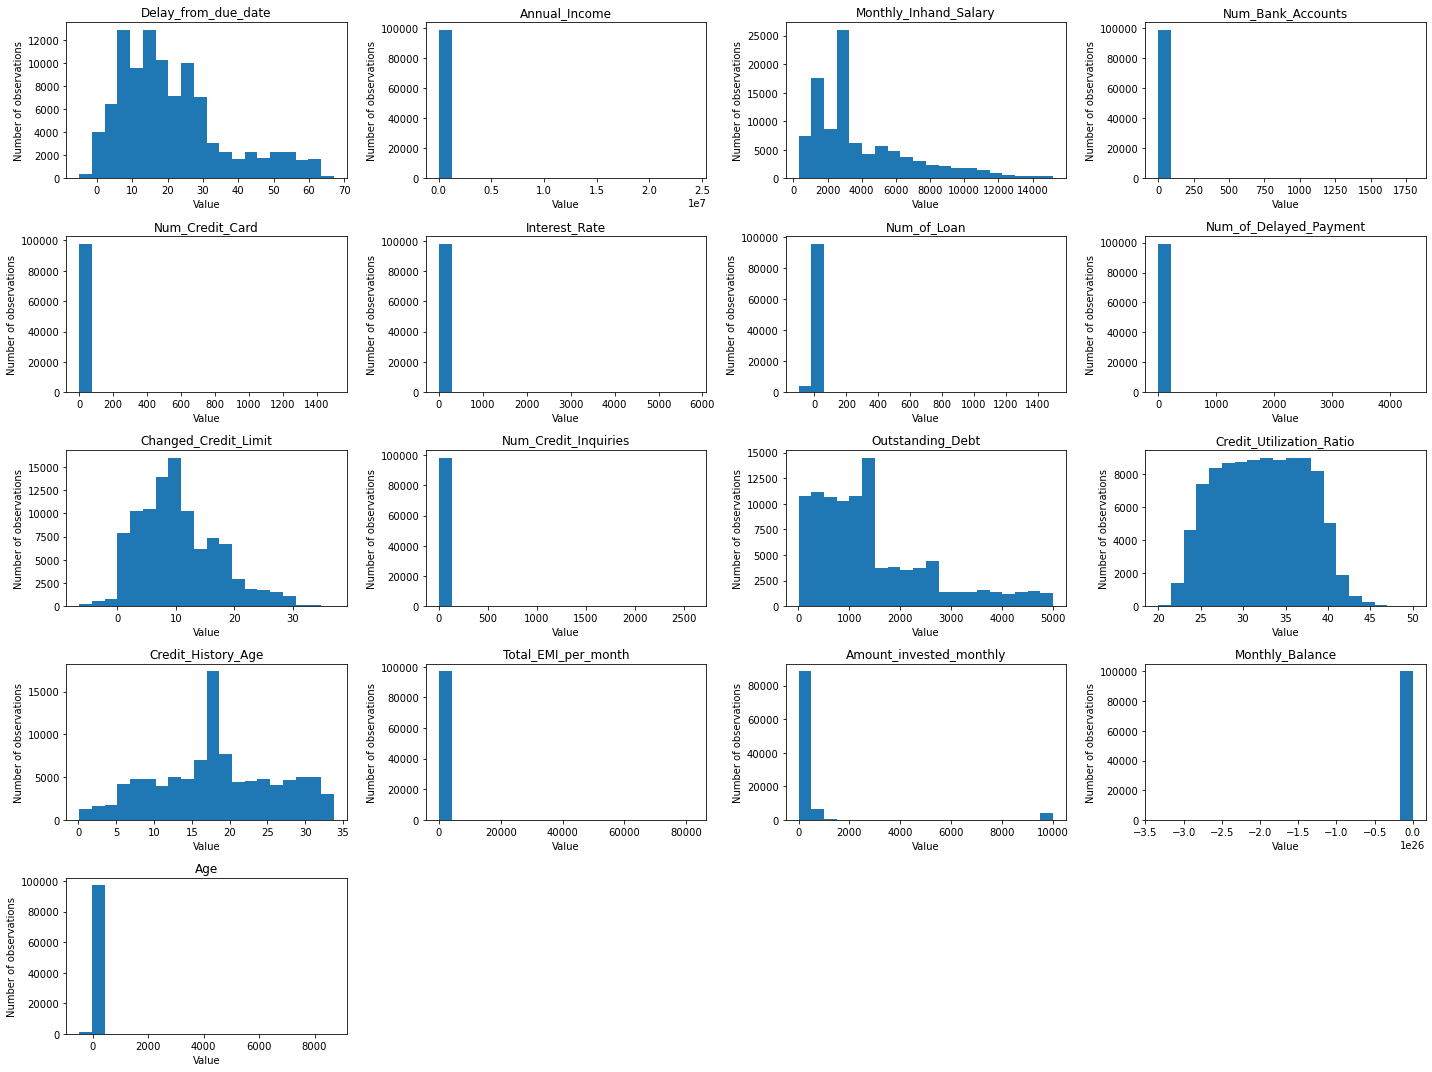

In [41]:
columns_num = ['Delay_from_due_date','Annual_Income','Monthly_Inhand_Salary',
'Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
'Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio',
'Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance', 'Age']

num_cols = 4 
num_rows = len(columns_num) // num_cols + (len(columns_num) % num_cols > 0) 


fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, column in enumerate(columns_num):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.hist(explored_data[column], bins=20)
    ax.set_xlabel('Value')
    ax.set_ylabel('Number of observations')
    ax.set_title(column)

if len(columns_num) < num_rows * num_cols:
    for j in range(len(columns_num), num_rows * num_cols):
        axes.flat[j].set_visible(False)

plt.tight_layout()
plt.show()

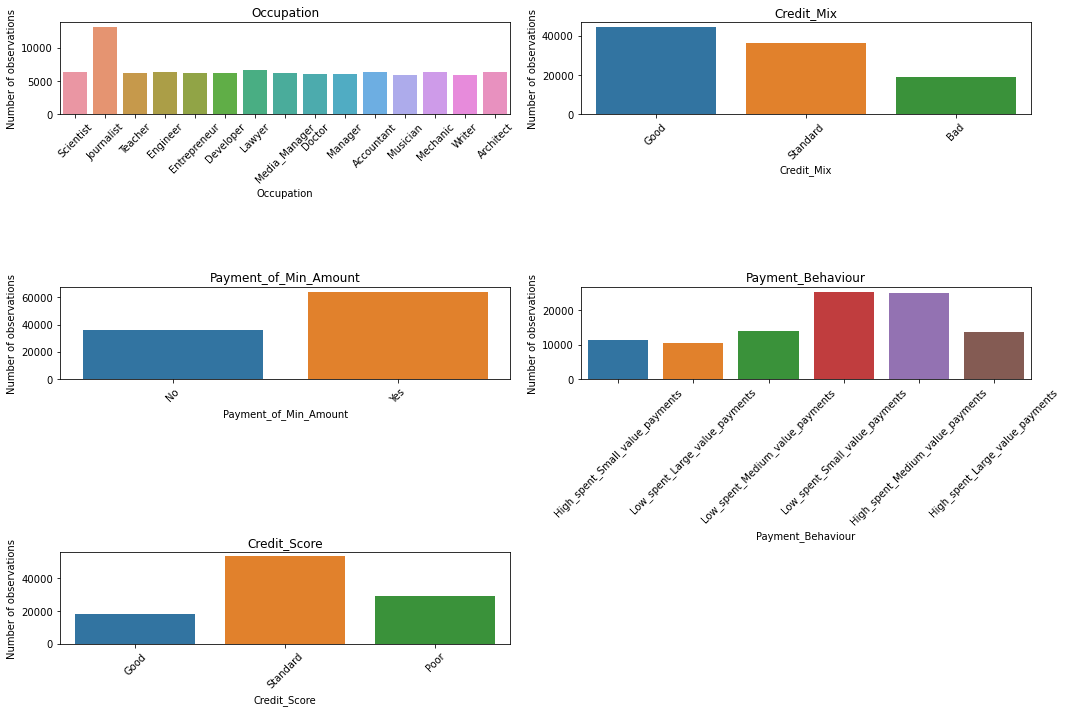

In [42]:
columns_text = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']

num_cols = 2 
num_rows = len(columns_text) // num_cols + (len(columns_text) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, column in enumerate(columns_text):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.countplot(x=column, data=explored_data, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Number of observations')
    ax.set_title(column)
    ax.tick_params(axis='x', rotation=45)

if len(columns_text) < num_rows * num_cols:
    for j in range(len(columns_text), num_rows * num_cols):
        axes.flat[j].set_visible(False)


plt.tight_layout()
plt.show()

comment: Based on the data distribution, a large number of outliers can be observed.

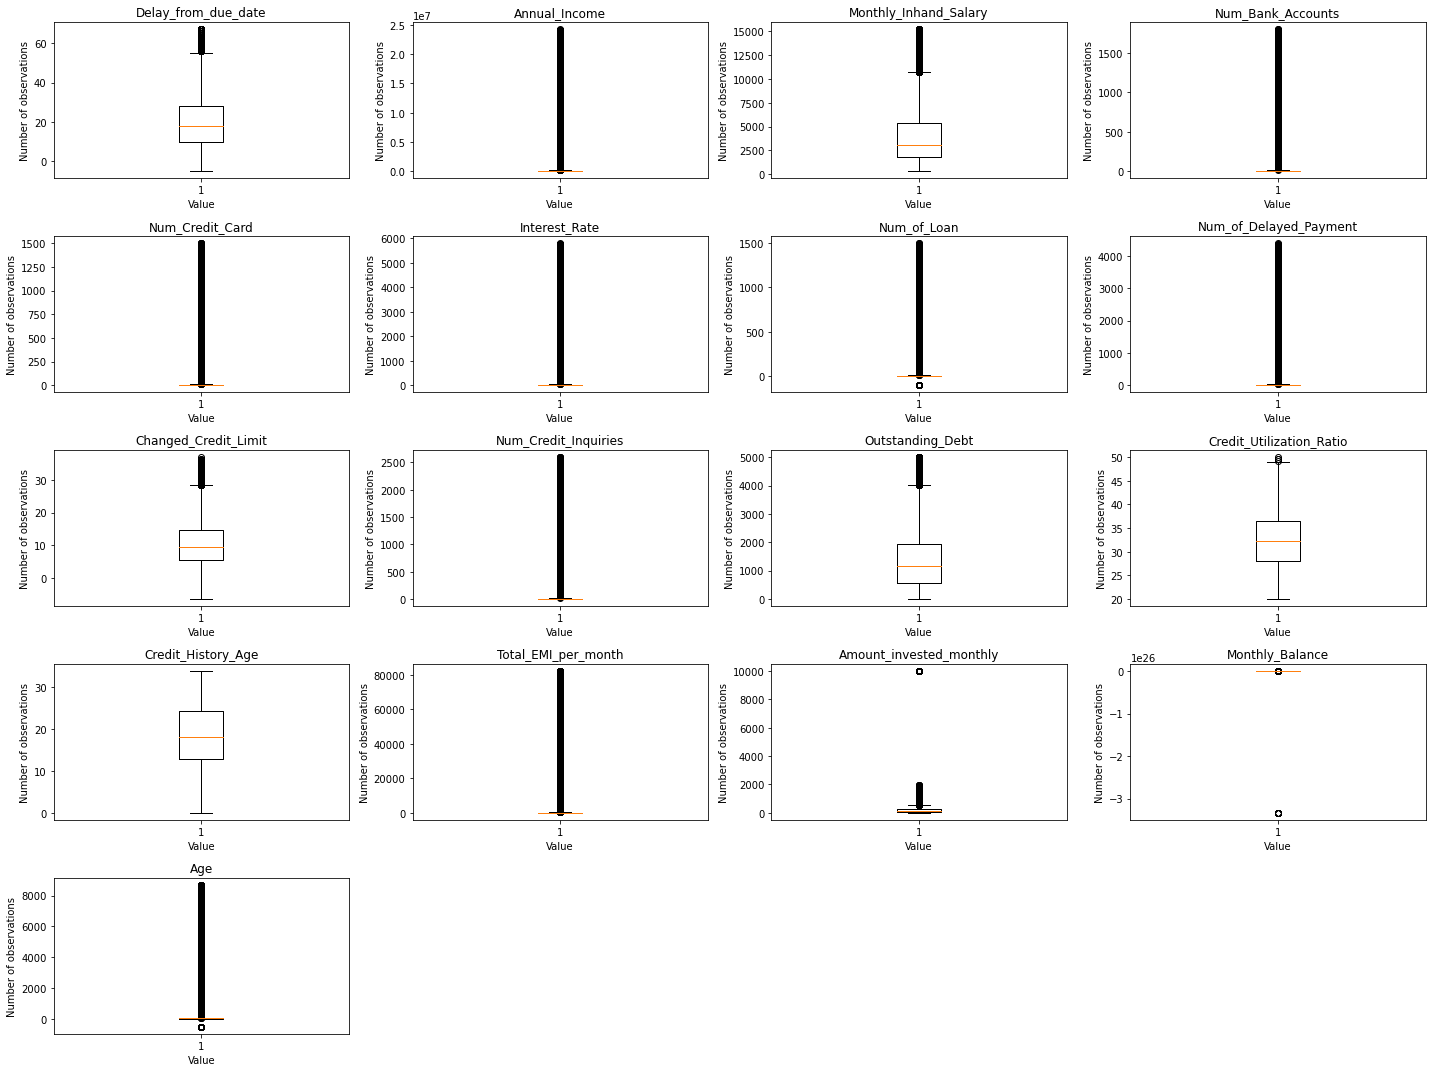

In [43]:
cols_outliers = ['Delay_from_due_date','Annual_Income','Monthly_Inhand_Salary',
'Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
'Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio',
'Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance', 'Age']

num_cols = 4 
num_rows = len(cols_outliers) // num_cols + (len(cols_outliers) % num_cols > 0) 


fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, column in enumerate(cols_outliers):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.boxplot(explored_data[column])
    ax.set_xlabel('Value')
    ax.set_ylabel('Number of observations')
    ax.set_title(column)

if len(cols_outliers) < num_rows * num_cols:
    for j in range(len(cols_outliers), num_rows * num_cols):
        axes.flat[j].set_visible(False)

plt.tight_layout()
plt.show()

In [44]:
def remove_outliers(data, columns, threshold=1.5):

    filtered_data = data.copy()
    
    for column in columns:
        Q1 = filtered_data[column].quantile(0.25)
        Q3 = filtered_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        filtered_data = filtered_data[(filtered_data[column] >= lower_bound) & (filtered_data[column] <= upper_bound)]
    
    return filtered_data

In [45]:
explored_data = remove_outliers(explored_data,columns_num)

In [46]:
explored_data = explored_data.drop_duplicates()

In [47]:
explored_data.shape

(55106, 22)

In [48]:
explored_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55106 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       55106 non-null  int64  
 1   Occupation                55106 non-null  object 
 2   Annual_Income             55106 non-null  float64
 3   Monthly_Inhand_Salary     55106 non-null  float64
 4   Num_Bank_Accounts         55106 non-null  int64  
 5   Num_Credit_Card           55106 non-null  int64  
 6   Interest_Rate             55106 non-null  int64  
 7   Num_of_Loan               55106 non-null  int64  
 8   Delay_from_due_date       55106 non-null  int64  
 9   Num_of_Delayed_Payment    55106 non-null  float64
 10  Changed_Credit_Limit      55106 non-null  float64
 11  Num_Credit_Inquiries      55106 non-null  float64
 12  Credit_Mix                55106 non-null  object 
 13  Outstanding_Debt          55106 non-null  float64
 14  Credit

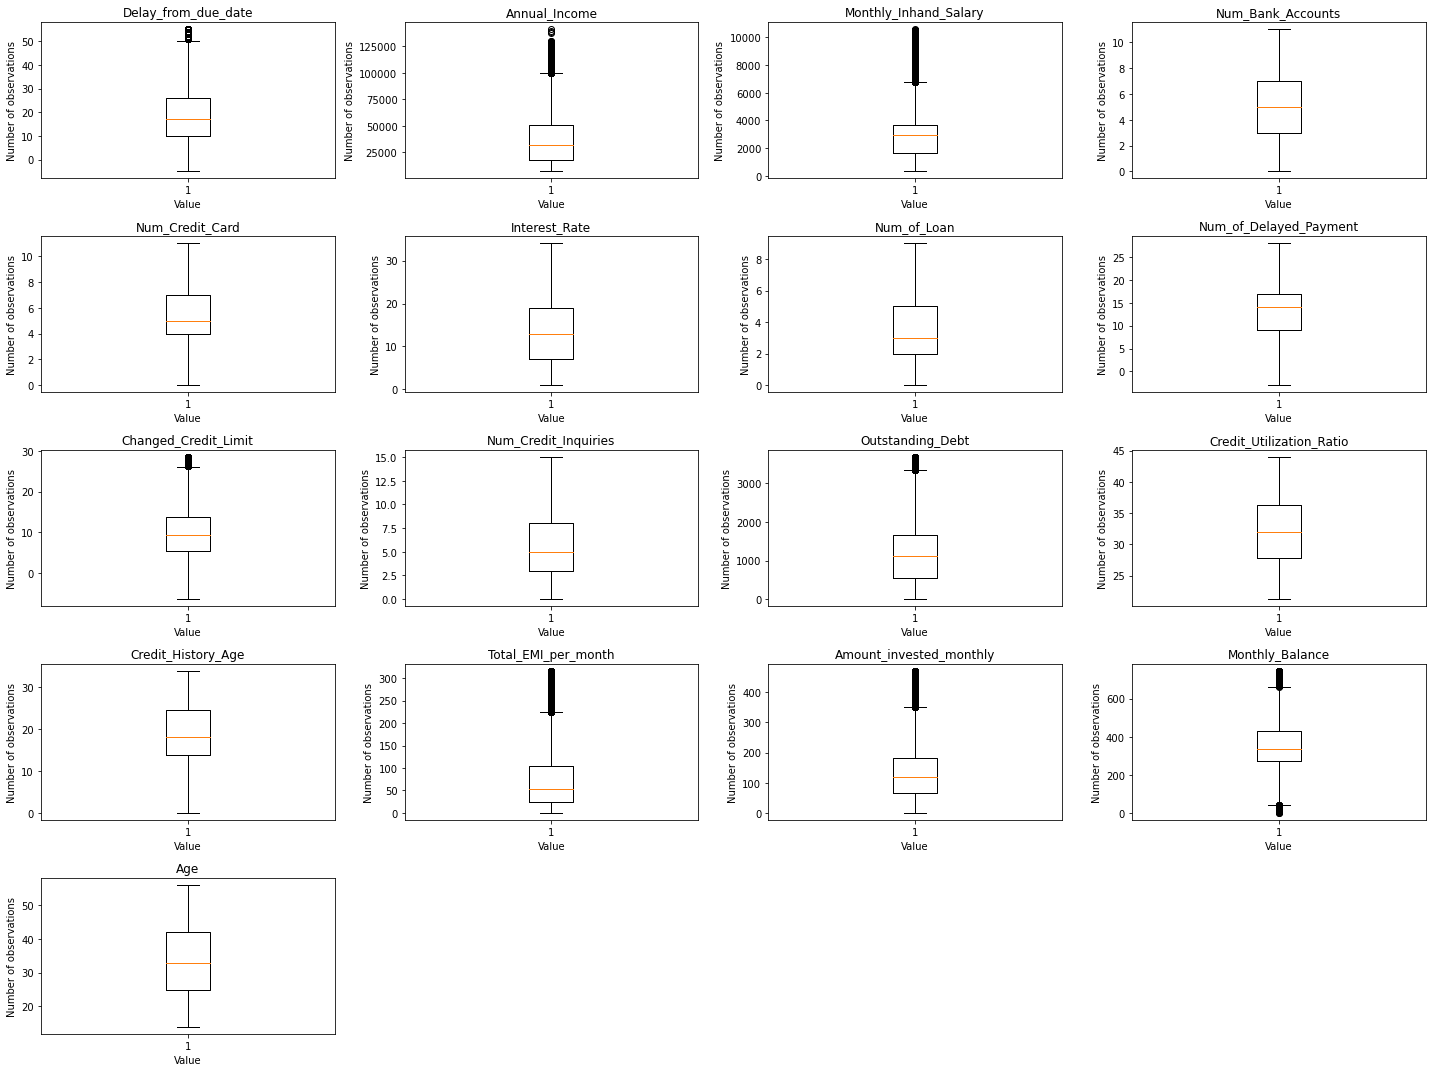

In [49]:
cols_outliers = ['Delay_from_due_date','Annual_Income','Monthly_Inhand_Salary',
'Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
'Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio',
'Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance', 'Age']
num_cols = 4 
num_rows = len(cols_outliers) // num_cols + (len(cols_outliers) % num_cols > 0) 


fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, column in enumerate(cols_outliers):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.boxplot(explored_data[column])
    ax.set_xlabel('Value')
    ax.set_ylabel('Number of observations')
    ax.set_title(column)

if len(cols_outliers) < num_rows * num_cols:
    for j in range(len(cols_outliers), num_rows * num_cols):
        axes.flat[j].set_visible(False)

plt.tight_layout()
plt.show()

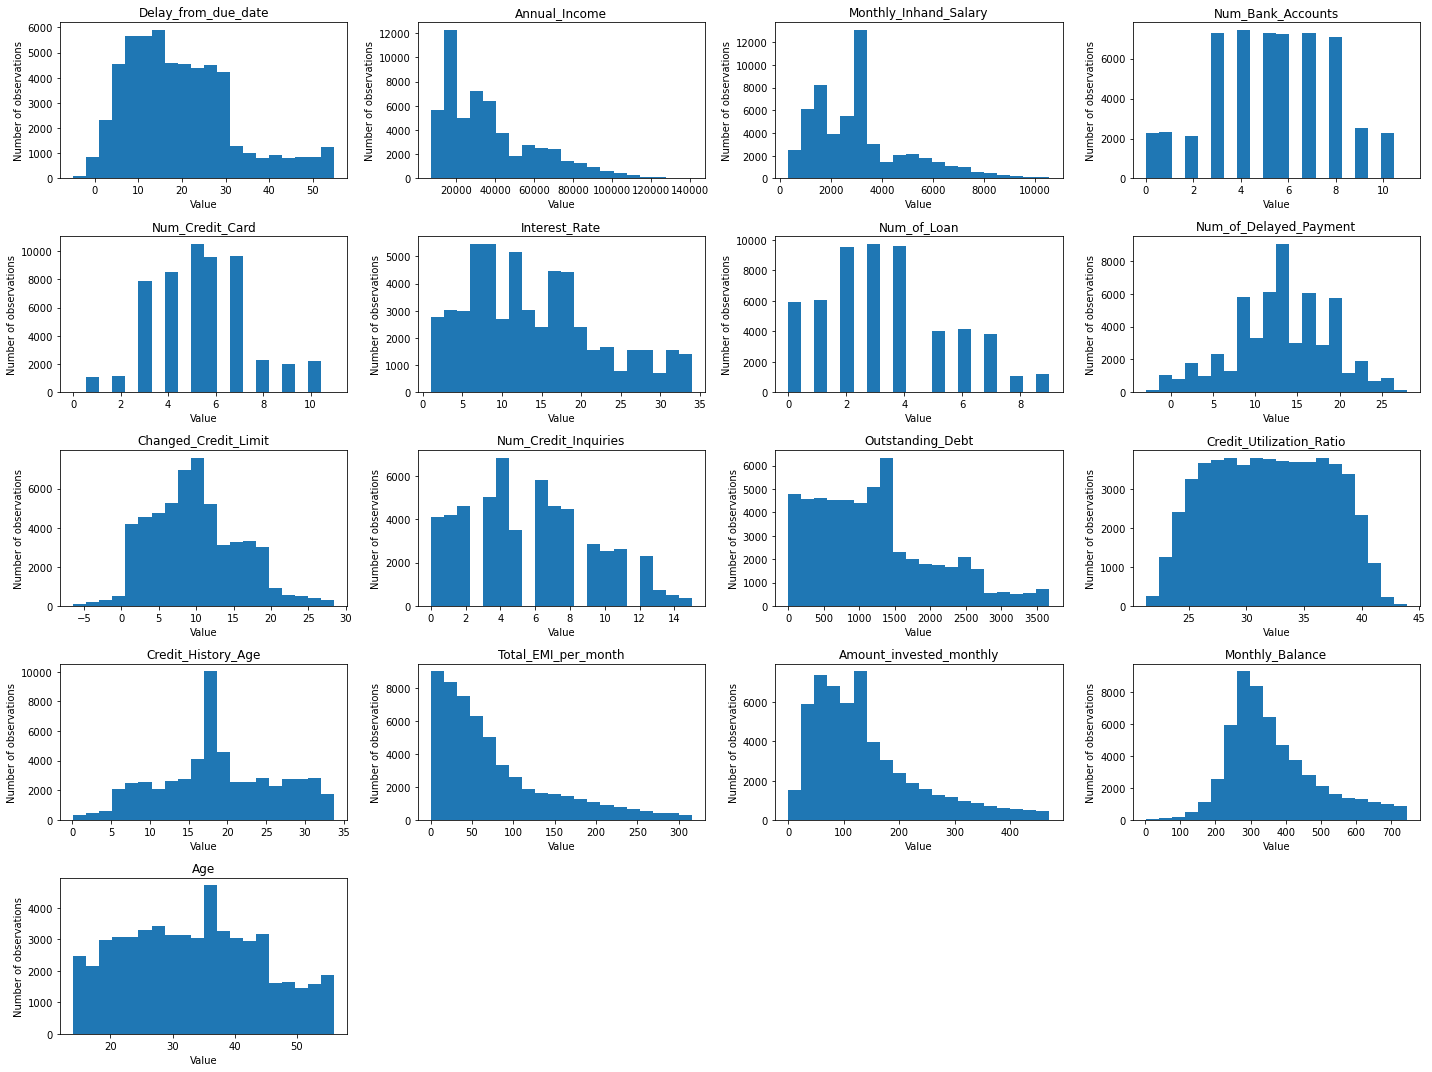

In [50]:
columns_no_outliers = ['Delay_from_due_date','Annual_Income','Monthly_Inhand_Salary',
'Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
'Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio',
'Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance', 'Age']

num_cols = 4 
num_rows = len(columns_no_outliers) // num_cols + (len(columns_no_outliers) % num_cols > 0) 


fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, column in enumerate(columns_no_outliers):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.hist(explored_data[column], bins=20)
    ax.set_xlabel('Value')
    ax.set_ylabel('Number of observations')
    ax.set_title(column)

if len(columns_num) < num_rows * num_cols:
    for j in range(len(columns_no_outliers), num_rows * num_cols):
        axes.flat[j].set_visible(False)

plt.tight_layout()
plt.show()

In [51]:
explored_data.sample(20)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
19351,39,Lawyer,15266.80,1000.23,5,6,17,7,29,19.0,...,Standard,877.84,37.26,16.80,Yes,79.95,65.62,Low_spent_Small_value_payments,244.45,Standard
51111,38,Architect,34215.86,3093.75,8,9,26,5,55,21.0,...,Bad,2582.60,39.80,18.20,Yes,96.77,185.12,Low_spent_Large_value_payments,274.04,Poor
69264,24,Media_Manager,14616.91,1206.08,8,6,27,8,48,14.0,...,Bad,2684.22,30.67,13.50,Yes,86.24,108.30,Low_spent_Medium_value_payments,206.07,Poor
51675,37,Mechanic,22953.95,2180.83,7,6,13,1,13,11.0,...,Standard,176.51,26.41,23.10,No,12.16,244.83,Low_spent_Small_value_payments,251.09,Poor
98802,22,Engineer,40511.74,3439.98,3,6,16,3,31,18.0,...,Standard,2272.58,33.26,16.60,Yes,69.28,134.25,High_spent_Small_value_payments,400.46,Standard
45218,39,Teacher,83418.18,7113.51,0,4,6,1,16,3.0,...,Good,972.51,39.52,29.11,No,59.58,192.43,High_spent_Medium_value_payments,709.34,Standard
38268,42,Media_Manager,20997.08,1895.76,0,2,8,0,10,6.0,...,Good,707.15,38.95,26.60,No,0.00,24.45,High_spent_Medium_value_payments,415.13,Good
4269,17,Lawyer,14675.83,3093.75,6,3,12,7,27,7.0,...,Standard,1427.56,37.94,12.80,Yes,84.00,66.91,Low_spent_Large_value_payments,252.18,Standard
12617,42,Media_Manager,13019.77,863.98,7,4,13,1,10,14.0,...,Standard,937.20,23.21,25.90,No,5.91,23.04,High_spent_Medium_value_payments,307.46,Standard
34348,14,Engineer,19253.02,1591.42,3,3,17,7,6,8.0,...,Standard,1264.11,27.44,6.50,Yes,78.30,130.17,Low_spent_Small_value_payments,240.67,Standard


In [52]:
numerical_columns = ['Delay_from_due_date','Annual_Income','Monthly_Inhand_Salary',
'Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
'Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio',
'Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance', 'Age']

<AxesSubplot:>

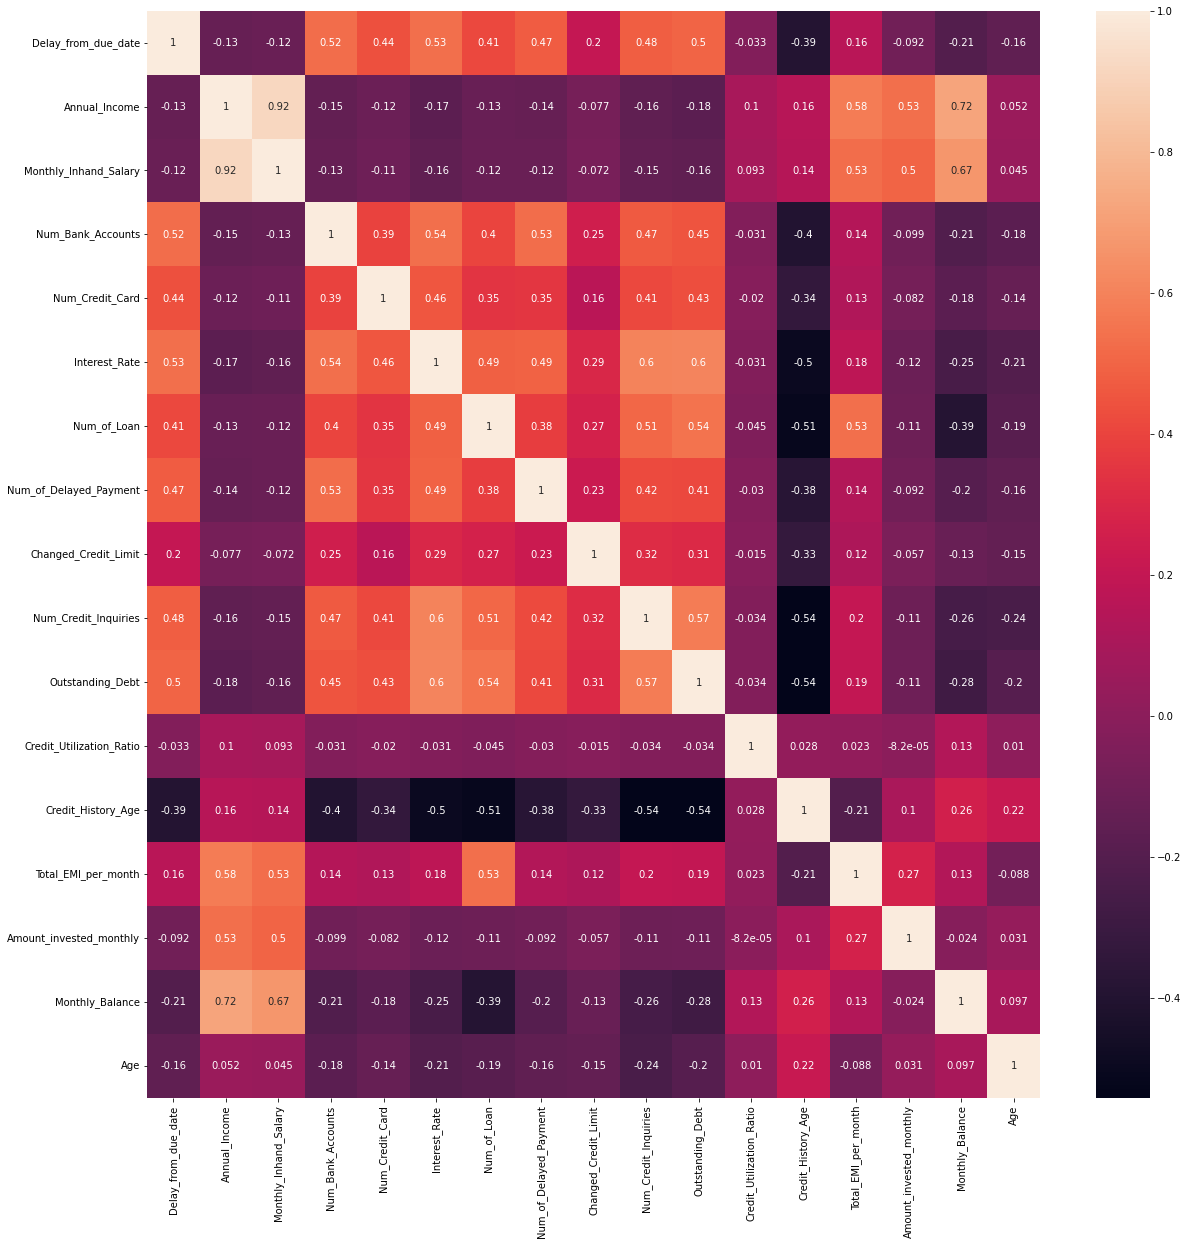

In [53]:
plt.figure(figsize= (20,20))
sns.heatmap(explored_data[numerical_columns].corr(),annot=True)

In [54]:
from scipy.stats import chi2_contingency
import scipy.stats as stats


table_category_data = pd.crosstab(explored_data['Occupation'], [explored_data['Credit_Mix'], explored_data['Payment_of_Min_Amount'], explored_data['Payment_Behaviour'], filled_data['Credit_Score']])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(table_category_data)
print("Chi-square test:")
print("Test statistic:", chi2_stat)
print("p Value:", p_value)
print("Degrees of freedom:", dof)

Chi-square test:
Test statistic: 1647.913432066285
p Value: 1.1337075924929542e-13
Degrees of freedom: 1246


### Data Modelling

In [55]:
data_model = explored_data.copy()

In [56]:
data_model['Credit_Score'] = data_model['Credit_Score'].replace({'Good':2, 'Standard':1, 'Poor':0})

In [57]:
columns_text = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

encoded_data = pd.get_dummies(data_model[columns_text], prefix=columns_text,drop_first=True)

encoded_data

,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,...,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
99995,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
99996,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
99998,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [58]:
data_model = data_model.drop(columns_text, axis=1)
data_model = data_model.join(encoded_data)

In [59]:
data_model.sample(20)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
84341,23,15710.56,1290.21,4,5,19,4,19,17.0,3.58,...,0,0,0,1,0,0,0,0,0,1
62231,20,19949.34,1378.44,8,7,20,6,53,23.0,17.83,...,0,0,0,0,1,0,1,0,0,0
57817,24,17223.88,3093.75,3,5,16,4,11,15.0,11.57,...,0,0,1,0,1,0,0,0,0,1
19904,21,44962.88,3521.91,3,2,11,1,5,11.0,9.04,...,0,0,1,0,0,0,0,0,1,0
13175,15,17927.60,1234.07,8,5,34,6,54,21.0,3.37,...,0,0,0,0,1,0,0,1,0,0
2182,30,7103.03,3093.75,6,5,28,6,55,14.0,11.95,...,0,0,1,0,1,0,0,1,0,0
77890,19,36933.77,3324.81,4,6,8,3,4,10.0,6.65,...,0,0,1,0,0,0,0,0,0,0
45495,21,42165.91,3658.83,4,3,7,0,-1,11.0,7.73,...,0,0,1,0,1,1,0,0,0,0
99809,19,39977.21,3093.75,4,7,11,0,13,13.0,9.62,...,0,0,1,0,0,1,0,0,0,0
78753,27,97363.36,8059.61,5,5,16,3,13,12.0,15.50,...,1,0,0,1,1,1,0,0,0,0


In [60]:
standarized_data = data_model.copy()

In [61]:
standarized_data.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_Score', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Good', 'Credit_Mix_Standard',
       'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behavio

In [62]:
standarized_cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance']

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()

In [65]:
standarized_data[standarized_cols] = scaler.fit_transform(standarized_data[standarized_cols])

In [66]:
standarized_data.sample(10)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
83594,-0.315483,-1.194017,-1.318093,0.688302,1.805069,0.349513,1.638569,2.064979,0.662145,-1.127269,...,0,0,0,0,1,0,0,0,0,1
3682,0.975294,-0.852503,-0.007639,1.089600,0.293579,-0.364765,1.638569,-0.898048,0.489614,1.290937,...,0,0,1,0,1,0,0,0,1,0
65174,1.067493,-0.660914,-0.834089,-0.114296,-1.217910,-0.126672,0.295720,-1.058212,-0.718100,-0.527769,...,0,0,1,0,0,0,0,0,0,0
32399,-1.698459,0.725106,0.786108,0.287003,1.805069,1.182836,-0.151897,1.824734,0.489614,1.378505,...,0,0,0,1,1,0,0,0,1,0
31275,-0.684277,-1.041393,-1.208771,1.089600,0.293579,0.587605,-0.599513,-0.017148,0.834676,-0.271803,...,0,1,0,1,1,0,0,0,0,1
10373,1.620683,1.996300,2.197630,-0.515595,-0.210251,-1.317134,-1.494746,-0.657803,-0.545570,-0.916770,...,0,0,1,0,0,0,0,0,0,1
29712,-1.237467,-0.820706,-0.951722,-0.515595,-1.217910,-0.840949,-0.151897,0.383261,-0.718100,0.238445,...,0,0,0,1,1,1,0,0,0,0
39876,0.790897,0.134621,0.168651,-0.515595,0.797409,-0.959996,-0.599513,-0.737885,-2.788468,-0.731532,...,0,0,1,0,0,0,0,0,0,1
87647,-0.223285,-0.901450,-0.007639,-1.719491,-0.210251,-0.364765,-0.599513,-0.737885,-1.235692,-0.920138,...,0,0,1,0,0,0,0,0,0,1
85569,-0.131086,1.023756,1.180572,-0.515595,-0.714080,-0.840949,0.295720,-0.337475,1.007206,-1.430386,...,0,0,1,0,0,0,0,1,0,0


### Data split

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
data = standarized_data.copy()

In [69]:
X = data
y = data.pop('Credit_Score')

In [70]:
X.shape

(55106, 39)

In [71]:
y.shape

(55106,)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [73]:
print(f'Train set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')
print(f'Target train set size: {y_train.shape}')
print(f'Target test size: {y_test.shape}')

Train set size: (38574, 39)
Test set size: (16532, 39)
Target train set size: (38574,)
Target test size: (16532,)


### Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [75]:
parameters_tree = {'max_depth':[None,1,2,3,4,5,6,7,8,9,10],
                     'criterion':['gini','entropy'],
                     'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]}

In [76]:
tree_clf = DecisionTreeClassifier()

grid_search_tree = GridSearchCV(tree_clf,parameters_tree,scoring='accuracy',cv=5)
grid_search_tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [77]:
best_params = grid_search_tree.best_params_
print("Best parameters:", best_params)
best_model = grid_search_tree.best_estimator_
accuracy = best_model.score(X, y)
print("Accuracy: ", accuracy*100)

Best parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1}
Accuracy:  73.98649874786774


In [78]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [79]:
y_pred_tree = best_model.predict(X_test)

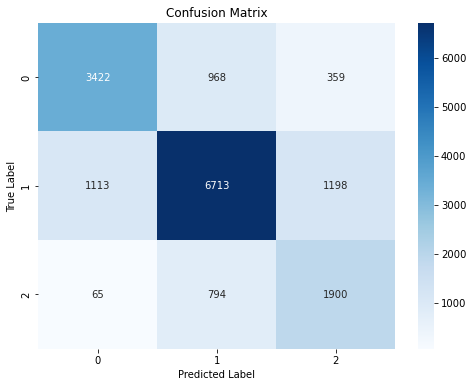

In [80]:
cm = confusion_matrix(y_test, y_pred_tree)

plot_confusion_matrix(cm)

In [81]:
print(classification_report(y_test,y_pred_tree, zero_division=1))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      4749
           1       0.79      0.74      0.77      9024
           2       0.55      0.69      0.61      2759

    accuracy                           0.73     16532
   macro avg       0.70      0.72      0.70     16532
weighted avg       0.74      0.73      0.73     16532



### Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
random_forest_cls = RandomForestClassifier()


param_grid_random_forest_clf = {
    'n_estimators': [5, 10, 15],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}


In [87]:
grid_search_random_forest = GridSearchCV(estimator=random_forest_cls, param_grid=param_grid_random_forest_clf, cv=5)

grid_search_random_forest.fit(X_train,y_train)

best_params = grid_search_random_forest.best_params_

In [90]:
print("Best parameters:", best_params)
best_model = grid_search_random_forest.best_estimator_
accuracy = best_model.score(X, y)
print("Accuracy: ", accuracy*100)

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 15}
Accuracy:  92.7739266141618


In [92]:
y_pred_random_forest = best_model.predict(X_test)

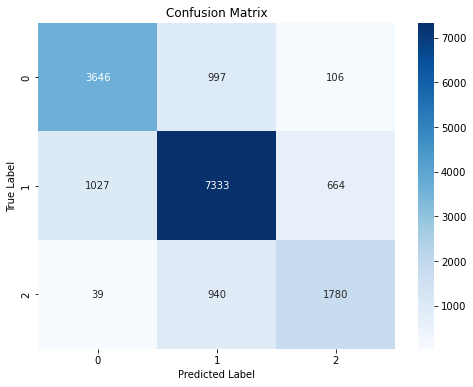

In [93]:
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)

plot_confusion_matrix(cm_random_forest)

In [94]:
print(classification_report(y_test,y_pred_random_forest, zero_division=1))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      4749
           1       0.79      0.81      0.80      9024
           2       0.70      0.65      0.67      2759

    accuracy                           0.77     16532
   macro avg       0.75      0.74      0.75     16532
weighted avg       0.77      0.77      0.77     16532

